# Code for plots
### Hernan E. Noriega

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import emcee

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys, os
sys.path.insert(0,os.path.realpath(os.path.join(os.getcwd(),'..')))
from getdist import plots, MCSamples
import getdist
import IPython

In [2]:
# esthetic definitions for the plots
font = {'size'   : 15, 'family':'sans-serif'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='small'
plt.rcParams["figure.figsize"] = [8.0,6.0]
plt.rcParams.update({ "text.usetex": True,
                      "font.family": "sans-serif"})

In [3]:
def get_stats_chains(chains, percentile=0.6827):
    """
    Calculate statistics for each chain in a list of chains.

    Parameters:
    chains (list of numpy arrays): List of chains, where each chain is a 2D numpy array.
    percentile (float): Desired percentile for calculating sigma ranges. Default is 0.6827.

    Returns:
    list of dictionaries: List containing dictionaries with calculated statistics for each chain.
    """
    
    results = []

    for chain in chains:
        n_params = chain.shape[1]
        stats = {'median': [], 'sigma-': [], 'sigma+': [], 'mean': [], 'sigma': []}

        for i in range(n_params):
            data = chain[:, i]
            nb_x = len(data)
            ind_inf = int(np.floor(nb_x * (0.5 - percentile/2)))
            ind_sup = int(np.ceil(nb_x * (0.5 + percentile/2)))
            ind_med = int(np.round(nb_x * 0.5))
            data_sorted = np.sort(data)
            stats['median'].append(data_sorted[ind_med])
            stats['sigma-'].append(data_sorted[ind_inf] - data_sorted[ind_med])
            stats['sigma+'].append(data_sorted[ind_sup] - data_sorted[ind_med])
            stats['mean'].append(np.mean(data))
            stats['sigma'].append(np.std(data))

        results.append(stats)

    return results

In [4]:
import matplotlib.pyplot as plt
import getdist.plots as plots
from getdist import MCSamples

def plot_triangular_chains(chains, labels, filled, contour_ls, contour_lws,
                           legend_labels, contour_colors, markers, params_to_show=None,
                           title=None, fontsize_title=None, title_x=None, title_y=None,
                           save_path=None, smoothing=False):
    '''
    Generate a triangular plot for multiple chains of samples.

    Args:
        chains (list): List of numpy arrays representing the sample chains.
        labels (list): Labels for the parameters in the chains.
        filled (list): List of True or False for filled contours or not.
        contour_ls (list): List of line styles: '-', '--', '-.', ':'.
        contour_lws (list): List of line widths.
        legend_labels (list): Labels for the legends of each chain.
        contour_colors (list): List of colors to be used.
        markers (list): List of markers for each chain.
        params_to_show (list, optional): List of parameters to be shown in the plot. Default is None.
        title (str, optional): Title of the plot. Default is None.
        fontsize_title (float, optional): Font size for the plot title.
        title_x (float, optional): x-coordinate of the plot title.
        title_y (float, optional): y-coordinate of the plot title.
        save_path (str, optional): Path to save the plot image. Default is None.
        smoothing (bool, optional): Whether to apply smoothing to the samples. Default is False.

    Returns:
        A beautiful triangular plot.
    '''

    # Create MCSamples instances for each chain
    samples = [MCSamples(samples=chain, names=labels) for chain in chains]

    # If params_to_show is not provided, show all parameters
    if params_to_show is None:
        params_to_show = labels

    # Apply smoothing if specified
    if smoothing:
        samples_smooth = [s.copy(settings={'mult_bias_correction_order': 1,
                                           'smooth_scale_2D': 0.7,
                                           'smooth_scale_1D': 0.7}) for s in samples]
    else:
        samples_smooth = samples

    # Plot settings
    g = plots.get_subplot_plotter()
    g.settings.figure_legend_frame = False
    g.settings.alpha_filled_add = 0.8
    g.settings.legend_fontsize = 18
    g.settings.axes_labelsize = 19
    g.settings.axes_fontsize = 16
    g.settings.axis_marker_color = 'k'
    g.settings.axis_marker_lw = 1.2

    # Generate the triangular plot with selected parameters
    g.triangle_plot(samples_smooth, params_to_show,
                    filled=filled,
                    contour_ls=contour_ls,
                    contour_lws=contour_lws,
                    legend_labels=legend_labels,
                    legend_loc='upper right',
                    contour_colors=contour_colors,
                    markers=markers,
                    line_args=[{'ls': ls, 'lw': lw, 'color': color} for ls, lw, color in zip(contour_ls, contour_lws, contour_colors)])

    # Add title to the plot
    if title:
        plt.suptitle(title, fontsize=fontsize_title, x=title_x, y=title_y)

    # Save the plot to the specified path
    if save_path:
        plt.savefig(save_path)

    # Show the plot
    plt.show()

Removed no burn in
Removed no burn in


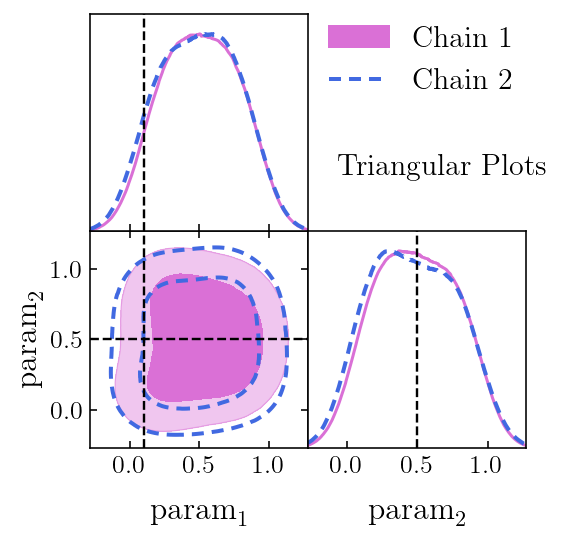

In [5]:
# Example usage:
chain1 = np.random.rand(100, 3)  # Example chain 1
chain2 = np.random.rand(150, 3)  # Example chain 2

labels = [r'$\textnormal{param}_1$', r'$\textnormal{param}_2$', r'$\textnormal{param}_3$']
legend_labels = [r'$\textnormal{Chain 1}$', r'$\textnormal{Chain 2}$']
filled = [True, False]
contour_ls = ['-', '--']
contour_lws = [1.5, 2.0]
contour_colors = ['orchid', 'royalblue']
markers = {r'$\textnormal{param}_1$':0.1, r'$\textnormal{param}_2$':0.5}

params_to_show = [r'$\textnormal{param}_1$', r'$\textnormal{param}_2$']  # List of parameters to show


plot_triangular_chains([chain1, chain2], labels, filled, contour_ls, contour_lws,
                       legend_labels, contour_colors, markers=markers, params_to_show=params_to_show,
                       title=r'$\textnormal{Triangular Plots}$', fontsize_title=15, title_x=0.8, title_y=0.7, 
                       save_path='triangular_plot.png', smoothing=True)


Removed no burn in
Removed no burn in


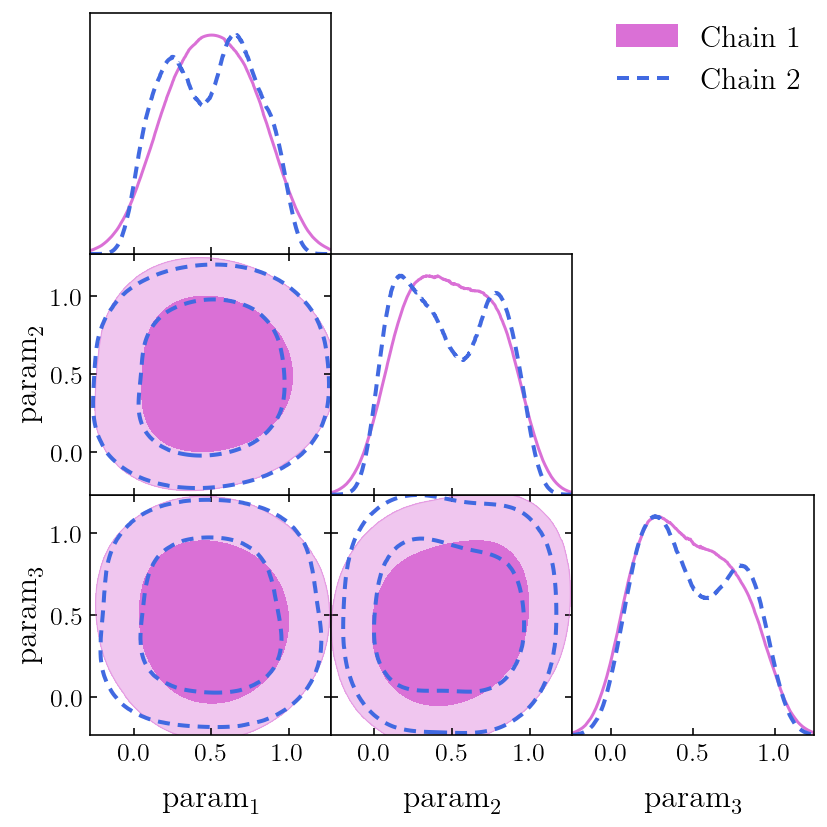

In [6]:
#No title, no save, no markers, no smoothing
plot_triangular_chains([chain1, chain2], labels, filled, contour_ls, contour_lws,
                       legend_labels, contour_colors, markers=[2], params_to_show=None,
                       title=None, fontsize_title=None, title_x=0.8, title_y=0.8, 
                       save_path=None)